How do we **measure the quality or value of the prediction** in the selected business or
science problem? What will be the quantitative score? **How does the quantitative score
reflect the quality or value of the prediction?** How does the (possibly asymmetric)
prediction error convert into cost or decreased KPI?

## Prediction value measurement and quantitative score(s)

### Usual classification metrics and their limitations

As a Machine Learning problem, the aim of this project is to provide a binary probabilistic classifier, that takes as an input a dermoscopic image of a mole, and provides as an output the probability of this mole being *malignant*, i.e. potentially dangerous for the patient. We will thus define the image to be classified as belonging to the **positive class** if it is malignant, and to the **negative class** if it is *benign*, i.e. not harmful.

We introduce the standard terminology used for such classification problems:

* **TP** = number of samples that were predicted as belonging to the positive class that are indeed positive (malignant moles here)
* **FP** = number of samples that were predicted positive but that are in fact negative
* **TN** = number of samples that were predicted as belonging to the negative class that are indeed negative (benign moles here)
* **FN** = number of samples that were predicted negative but that are in fact positive

For further readability, we also introduce some other terminology that is sometimes used:

* **P** = number of samples that are *really* labelled as belonging to the positive class, according to the gold standard malignancy diagnosis
* **N** = number of samples that are *really* labelled as negative

With all of this set up, we can define the metrics that are usually used for evaluating binary classifiers:

The most obvious and famous one is the **Accuracy**, which is simply the percentage of correctly classified samples among the data set, and read:

$$
AC = \frac{TP + TN}{P + N}
$$

Another very common classification metric is the **Recall**, also known as the **Sensitivity** in Statistics, or as the **True-Positive rate** TPR. This ratio expresses how much of the members of the positive class has been well predicted by the classifier:

$$
SE = \frac{TP}{TP + FN}
$$

One final common perfomance indicator that we will introduce is the **Specificity** (the complementary of what we will further call the False-Positive rate FPR), which this time describes how well the classifier did in identifying the members of the negative class:

$$
SP = \frac{TN}{TN + FP}
$$

Intuitively, these scores tend to describe well what we want to accomplish here: identify the right class for a given input. However, in our particular setting, like for most disease detection ones in Machine Learning, limiting us to a balanced combination of just these 3 scores will not be sufficient, nor reflect the true quality of the classifier's predictions.

First, our **dataset is quite imbalanced**: malignant moles only represent around 30% of the dataset. Despite not being *highly* imbalanced, this suffices to favor benign predictions when it comes to only focusing on a raw accuracy improvement. For instance, predicting all moles as being benign would lead to an accuracy score around 70%, against 30% for an only malignant prediction.

This leads us to the second important point, as the prediction can have a direct impact on the patient's decision to consult his dermatologist or not, **the prediction error cost is highly asymmetric**: we want to incorporate in the general score the fact that **failing the prediction of a trully maligant mole has a much dramatic effect than sending someone to its dermatologist for a benign one**. For this reason, we want to put more wait on the recall score, as defined above, but we will also add another score that goes in this sense later in this section.

### Area under the ROC curve

To tackle the imbalance problem (as well as the false negative minimisation one, as we will see), we will also grant importance to the **AUC** metric. Formally, this metric simply measures the area under the Receiver Operating Characteristic (**ROC**) for the given classifier.

As a simplified example, let us suppose that 3 distinct binary probabilistic classifiers outputed the following distributions, each concerning the evaluation of samples standardly labeled as <font color="blue">**truly negative**</font>, in <font color="blue">**blue**</font> and standardly labeled as <font color="red">**truly positive**</font>, in <font color="red">**red**</font>:

![example_distributions](img/example_dist.png)

**Note:** this example is overly simplified, here we suppose that the outputed distribution/**probabilities of belonging to the positive class*** of each classifiers corresponds exactly to the same shifted normal distribution for the negatively and positively labeled samples. The y-axis can be interpreted as the frequency of <font color="blue">**negative**</font>/<font color="red">**positive**</font> samples for which the classifier outputed as a score the same x value.

_*****As we will see however, the AUC's logic will be the same even if the outputed does not rigorously represent a probability, what really matters is that the x value for a positive sample has to be significantly more often larger than the one for a negative sample._

Intuitively, we see that those 3 classifiers don't perform equally well in **clearly separating the 2 classes**. More formally, for the two last ones, we cannot really choose a **threshold $\alpha \in [0, 1]$** in the x values, so that:

* $score(sample) \ge \alpha \rightarrow \hat{class} = positive$
* $score(sample) \lt \alpha \rightarrow \hat{class} = negative$

Where $score(sample)$ refers to the score outputed by the classifier for a given sample, and $\hat{class}$ refers to the deduced _hard_ predicted class. For instance $\alpha = 0.5$ could be graphically represented as:

![example_distributions_thres0.5](img/example_dist_thres05.png)

When the score represents the probability of the positive class, setting the threshold to 0.5 to determine whether a probalistic output can be interpreted as the prediction of a negative or positive class is very common done when working with classifiers. However, one important thing to note is that we have the freedom to choose such a threshold. This choice of a threshold has an important consequence on several performance metric of a classifier. Here we will focus on two in particular:

The True-Positive Rate (**TPR**), or Recall, which we already introduced:

$$
TPR = \frac{TP}{TP + FN}
$$

The False-Positive Rate (**FPR**) which we also introduced as the complementary of the sensitivity.

$$
FPR = \frac{FP}{FP + TN}
$$

Thus, the **TPR** of a classifier corresponds to **how much of the truly positive samples the classifier has been able to correctly identify**, whereas its **FPR** corresponds to **the proportion of the truly negative samples the classifier misclassified**. (How much the classifier detected the positives vs. how much it missed the negatives).

Having defined all this, we can easily define the **ROC curve** of a classifier, which is simply **its TPR as a function of its FPR for all possible thresholds value ranging from 0 to 1**. As an example are given the ROC curves corresponding to the classifier defined above, highlighting the points that corresponds to thresholds chosen at 0, 0.5 and 1:

![example_ROC curves](img/example_roc.png)

The ROC curve being directly function of the distributions outputed by a classifier, we therefore have **one ROC curve by classifier, and one dot on this curve by threshold value**. As we might intuitively expect, we can see above that for all classifiers:

* $\alpha = 1 \rightarrow TPR = FPR = 0$. Setting such a threshold indeed corresponds to classifying all samples as being negative, the classifier in this case does not miss any negative predictions ($FPR = 0$), but misses all the predictions for the truly positive samples ($TPR = 0$). **This would correspond as classifying every single image as representing a benign mole in our context.**

* $\alpha = 0 \rightarrow TPR = FPR = 1$. This time, this corresponds to predicting all samples as belonging to the positive class. Hence we missing all the prediction for truly negative samples ($FPR = 1$) but correctly predicting the class of all the truly positive ones ($TPR = 1$). **This would correspond as classifying every image as malignant in our context.**

That being said, what we ultimately want to do is to find the (classifier, threshold) combination that maximizes the TPR (predicting well the malignant moles), while minimizing the amount of benign moles wrongly classified as malignant, that is, minimizing the FPR. **This can be summarized by saying we ultimately want to end up as close to the top left corner of a ROC curve as possible, with a preference towards being at the top, to be in accordance with our prior objective to accurately detect the truly malignant moles.** 

As we easily picture looking at the simplified examples above, **getting to those top-left points is only possible if the classifier for the corresponding ROC curve is able to separate enough the samples from the 2 classes**. If it is able to do so, then we will always be able to find a threshold so that the predictions of the model maximize its recall without its specificity dropping too hard. 

For models that do a poor job in separating the two classes however, increasing the recall by adjusting the threshold will be much more likely to decrease the specificity quite linearly. Classifier 3 above for example, performs no better than a random guess with a threshold put at 0.5 (50% of wrongly classified samples, being truly negative or positive).

The Area Under the Curve (**AUC**) of a model can be seen as measuring the proportion of the unit square that is under its ROC curve. Evaluating this score gives a good indicator of **how well a model does at separating the 2 classes**, and can also be seen, in the most general setting, as the **probability that this classifier ranks a randomly chosen truly positive sample above a randomly chosen truly negative one**.

Perfectly smooth probability distributions have been chosen here for explanatory purposes only, but one of the main advantages of using AUC as a score is that it focuses on the classifier's ability to separate the 2 classes by ranking them only. **This indicator is therefore completely indifferent about the imbalance between the classes**.

### Sensitivity for the threshold(s) yielding 97% recall

Using the AUC of the model as a score will permit us to favor models whose ROC spreads out the most. However, what we ultimately want is to **find an ROC and a threshold** so that the recall is very high, without frightening too often the patients with false alerts. 

In order to do so, a good thing to add into our mixed metric could be the sensitivity achieved by the model when setting a threshold that "forces" it to have a 97% recall:

![example_ROC curves with forced recall](img/example_roc_recall.png)

Reminding that the sensitivity is the 1-complementary of the FPR, this score will express that what we want in the end is to favor models that minimize false negatives when being forced to maximize true positives.

### Considered scores and mixed score

To conclude, the scores we are going to consider in evaluating the value of a classifier will be (in decreasing order of importance):

* Sensitivity at the threshold yielding 97% recall
* AUC
* Recall (Sensitivity)
* Specificity
* Accuracy

All these scores range from 0 to 1, the _"best"_ value being 1 for all of those. For interpretability, we will display these scores as they are, not transforming them.

The contestants will be ranked according to a weighted average **mixed score**, which will account for all these metrics, giving more importance to the sensitivity ar 97% recall and AUC. To follow the scikit-learn scoring convention, **the mixed score will range from 1 to 0, where 0 will be the best possible score**.

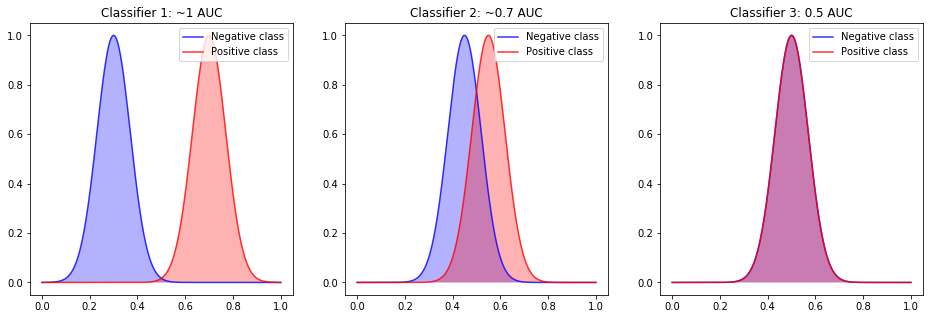

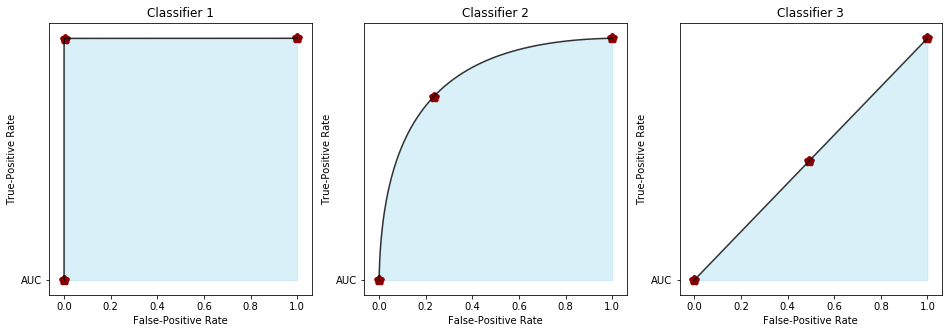

In [56]:
# Code for generating the above plots:
import numpy as np 
import matplotlib.pyplot as plt

# Density of the normal distribution
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Distributions plotting setting
fig_dist = plt.figure(figsize=(16, 5))
axes_dist = []
mus = [[0.3, 0.7], [0.45, 0.55], [0.5, 0.5]]
titles = ['~1', '~0.7', '0.5']

# ROC curves-ish setting
fig_roc = fig = plt.figure(figsize=(16, 5))
axes_roc = []

def add_gaussians(ax, mus): 
    x = np.linspace(0, 1, 500)
    neg_dist = gaussian(x, mus[0], 0.07)
    pos_dist = gaussian(x, mus[1], 0.07)
    # Outline
    ax.plot(x, neg_dist, c='b', alpha=0.8, label="Negative class")
    ax.plot(x, pos_dist, c='r', alpha=0.8, label="Positive class")
    # Fill
    ax.fill(x, neg_dist, 'b', x, pos_dist, 'r', alpha=0.3)
    ax.legend(loc="upper right")
def add_roc(ax, mus):
    x = []
    y = []
    for alpha in np.linspace(0, 1, 500):
        x.append(1 - norm.cdf(alpha, loc=mus[0], scale=0.07))
        y.append(1 - norm.cdf(alpha, loc=mus[1], scale=0.07))
    # Outline
    ax.plot(x, y, c='k', alpha=0.8)
    ax.fill_between(x, y, 'AUC', color='skyblue', alpha=0.3)
    x_thres = [x[0], x[int(len(x) / 2)], x[-1]]
    y_thres = [y[0], y[int(len(x) / 2)], y[-1]]
    ax.scatter(x_thres, y_thres, marker='*', color='darkred', linewidths=5)
    plt.xlabel('False-Positive Rate')
    plt.ylabel('True-Positive Rate')

for i in range(3):
    axes_dist.append(fig_dist.add_subplot(131 + i))
    axes_dist[-1].set_title('Classifier ' + str(i + 1) + ': ' + titles[i] + ' AUC')
    add_gaussians(axes_dist[-1], mus[i])
    
    axes_roc.append(fig_roc.add_subplot(131 + i))
    axes_roc[-1].set_title('Classifier ' + str(i + 1))
    add_roc(axes_roc[-1], mus[i])
plt.show()